# Capstone Project - The Battle of Neighborhoods

## Coursera Applied Data Science Capstone - Final Project

## Importing libraries

In [109]:
import pandas as pd
import requests
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
!pip install folium
import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns

## Reading csv file with Milan neighborhoods data

In [110]:
neighborhood = pd.read_csv('https://raw.githubusercontent.com/enrico-88/github-example/master/Milan_neighborhoods.csv')

In [111]:
neighborhood.head()

,Neighborhood,Latitude,Longitude
0,ADRIANO,45.511738,9.245336
1,AFFORI,45.514814,9.172760
2,ASSIANO,45.455063,9.062976
3,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,45.461175,9.088395
4,BANDE NERE,45.460703,9.138751


In [112]:
neighborhood.shape

(88, 3)

## Getting nearby venues from Foursquare

In [113]:
# The code was removed by Watson Studio for sharing.

In [114]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [115]:
milan_venues = getNearbyVenues(names=neighborhood['Neighborhood'],
                                   latitudes=neighborhood['Latitude'],
                                   longitudes=neighborhood['Longitude']
                                  )

ADRIANO
AFFORI
ASSIANO
BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA
BANDE NERE
BARONA
BICOCCA
BOVISA
BOVISASCA
BRERA
BRUZZANO
BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE
CANTALUPA
CASCINA MERLATA
CHIARAVALLE
CIMIANO - ROTTOLE - Q.RE FELTRE
CITTA' STUDI
COMASINA
CORSICA
DE ANGELI - MONTE ROSA
DERGANO
DUOMO
FARINI
FIGINO
FORZE ARMATE
GHISOLFA
GIAMBELLINO
GIARDINI P.TA VENEZIA
GORLA - PRECOTTO
GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE
GRECO - SEGNANO
GUASTALLA
ISOLA
LAMBRATE - ORTICA
LODI - CORVETTO
LORENTEGGIO
LORETO - CASORETTO - NOLO
MACIACHINI - MAGGIOLINA
MAGENTA - S. VITTORE
MAGGIORE - MUSOCCO - CERTOSA
MONCUCCO - SAN CRISTOFORO
MONLUE' - PONTE LAMBRO
MORIVIONE
MUGGIANO
NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE FULVIO TESTI
ORTOMERCATO
PADOVA - TURRO - CRESCENZAGO
PAGANO
PARCO BOSCO IN CITTA'
PARCO DEI NAVIGLI
PARCO DELLE ABBAZIE
PARCO FORLANINI - CAVRIANO
PARCO NORD
PARCO SEMPIONE
PORTA GARIBALDI - PORTA NUOVA
PORTA GENOVA
PORTA MAGENTA
PORTA TICINESE - CONCA DEL NAVIGLIO
POR

In [116]:
print(milan_venues.shape)
milan_venues.head()

(2384, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ADRIANO,45.511738,9.245336,Cargo,45.508406,9.243159,Furniture / Home Store
1,ADRIANO,45.511738,9.245336,Osteria Ai 3/4,45.508452,9.243858,Italian Restaurant
2,ADRIANO,45.511738,9.245336,Zan Zara Zan,45.508652,9.242995,Café
3,ADRIANO,45.511738,9.245336,Unieuro,45.514146,9.244038,Electronics Store
4,ADRIANO,45.511738,9.245336,Esselunga,45.513782,9.244425,Supermarket


## Grouping Venues

In [117]:
milan_venues.groupby('Neighborhood').count() # number of venues returned for each neighborhood

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ADRIANO,19,19,19,19,19,19
AFFORI,15,15,15,15,15,15
ASSIANO,3,3,3,3,3,3
BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,11,11,11,11,11,11
BANDE NERE,23,23,23,23,23,23
BARONA,11,11,11,11,11,11
BICOCCA,33,33,33,33,33,33
BOVISA,37,37,37,37,37,37
BOVISASCA,20,20,20,20,20,20


In [118]:
# one hot encoding
milan_onehot = pd.get_dummies(milan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
milan_onehot['Neighborhood'] = milan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [milan_onehot.columns[-1]] + list(milan_onehot.columns[:-1])
milan_onehot = milan_onehot[fixed_columns]

milan_onehot.head()

,Yoga Studio,Accessories Store,Adult Education Center,African Restaurant,Airport,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
milan_onehot.shape # new dataframe size

(2384, 263)

In [120]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
milan_grouped = milan_onehot.groupby('Neighborhood').mean().reset_index()
milan_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Education Center,African Restaurant,Airport,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store
0,ADRIANO,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,AFFORI,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,ASSIANO,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,BANDE NERE,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
5,BARONA,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
6,BICOCCA,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
7,BOVISA,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.027027,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
8,BOVISASCA,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,...,0.000000,0.05,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
9,BRERA,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.01,0.0,0.000000,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.030000,0.000000,0.0,0.000000


In [121]:
milan_grouped.shape # new size

(87, 263)

In [122]:
# function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [123]:
# new dataframe with the top 10 venues for each neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = milan_grouped['Neighborhood']

for ind in np.arange(milan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(milan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADRIANO,Italian Restaurant,Café,Supermarket,Electronics Store,Pharmacy,Toy / Game Store,Coffee Shop,Bistro,Soccer Field,Hostel
1,AFFORI,Pizza Place,Park,Hotel,Italian Restaurant,Health Food Store,Cocktail Bar,Fried Chicken Joint,Pool Hall,Café,Salon / Barbershop
2,ASSIANO,Restaurant,Mediterranean Restaurant,Pizza Place,Food & Drink Shop,Film Studio,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food Court
3,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,Pizza Place,Italian Restaurant,Gastropub,Park,Convenience Store,Café,Supermarket,Japanese Restaurant,Bar,Fountain
4,BANDE NERE,Hotel,Restaurant,Café,Ice Cream Shop,Hostel,Pharmacy,Pizza Place,Food Court,Hobby Shop,Cosmetics Shop


## K-Means Clustering - finding optimal value for k

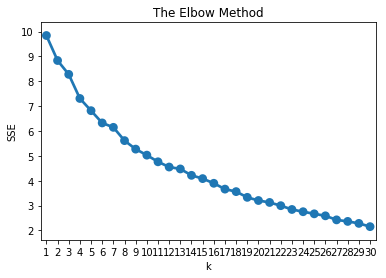

In [124]:
milan_grouped_clustering = milan_grouped.drop('Neighborhood', 1)

sse = {}

# Fit KMeans and calculate SSE for each k
for k in range(1, 31):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=0).fit(milan_grouped_clustering)
        
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_ 

# Add the plot title, x and y axis labels
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

## There seems to be an elbow at k=6, let's now use this value

In [125]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(milan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 0, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [127]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

milan_merged = neighborhood

# merge toronto_grouped with neighborhood to add latitude/longitude for each neighborhood
milan_merged = milan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [128]:
milan_merged=milan_merged.dropna(axis=0, subset=['Cluster Labels'])

In [129]:
milan_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADRIANO,45.511738,9.245336,3.0,Italian Restaurant,Café,Supermarket,Electronics Store,Pharmacy,Toy / Game Store,Coffee Shop,Bistro,Soccer Field,Hostel
1,AFFORI,45.514814,9.172760,0.0,Pizza Place,Park,Hotel,Italian Restaurant,Health Food Store,Cocktail Bar,Fried Chicken Joint,Pool Hall,Café,Salon / Barbershop
2,ASSIANO,45.455063,9.062976,0.0,Restaurant,Mediterranean Restaurant,Pizza Place,Food & Drink Shop,Film Studio,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food Court
3,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,45.461175,9.088395,3.0,Pizza Place,Italian Restaurant,Gastropub,Park,Convenience Store,Café,Supermarket,Japanese Restaurant,Bar,Fountain
4,BANDE NERE,45.460703,9.138751,3.0,Hotel,Restaurant,Café,Ice Cream Shop,Hostel,Pharmacy,Pizza Place,Food Court,Hobby Shop,Cosmetics Shop


## Visualizing clustered neighborhoods on a Map

In [130]:
address = 'Milan, IT'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Milan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Milan are 45.4668, 9.1905.


In [131]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(milan_merged['Latitude'], milan_merged['Longitude'], milan_merged['Neighborhood'], milan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(int(cluster)+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color = rainbow[int(cluster)-2],
        fill=True,
        fill_color=rainbow[int(cluster)-2],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining clusters

### Cluster 1 - Pizza and Café

In [132]:
milan_merged.loc[milan_merged['Cluster Labels'] == 0, milan_merged.columns[[0] + list(range(3, milan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,AFFORI,0.0,Pizza Place,Park,Hotel,Italian Restaurant,Health Food Store,Cocktail Bar,Fried Chicken Joint,Pool Hall,Café,Salon / Barbershop
2,ASSIANO,0.0,Restaurant,Mediterranean Restaurant,Pizza Place,Food & Drink Shop,Film Studio,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food Court
20,DERGANO,0.0,Pizza Place,Diner,Pet Store,Peruvian Restaurant,Performing Arts Venue,Food,Plaza,Bistro,Park,Café
24,FORZE ARMATE,0.0,Pizza Place,Dance Studio,Farm,Lounge,Building,Furniture / Home Store,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant,Fountain
34,LODI - CORVETTO,0.0,Pizza Place,Department Store,Nightclub,Café,Bookstore,Snack Place,Movie Theater,Gym / Fitness Center,Bar,Clothing Store
35,LORENTEGGIO,0.0,Café,Park,Hockey Arena,Pool,Pizza Place,Fountain,Football Stadium,Food Truck,Film Studio,Food Court
44,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,0.0,Pizza Place,Sushi Restaurant,Theater,Hotel,Supermarket,Food Court,Flea Market,Flower Shop,Food,Food & Drink Shop
62,Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO,0.0,Fast Food Restaurant,Pizza Place,Ice Cream Shop,Metro Station,Asian Restaurant,Clothing Store,Hardware Store,Food,Fish & Chips Shop,Flea Market
82,TRENNO,0.0,Pizza Place,Plaza,Bakery,Adult Education Center,Pub,Soccer Field,Park,Sandwich Place,Food & Drink Shop,Flea Market


### Cluster 2 - B&Bs

In [133]:
milan_merged.loc[milan_merged['Cluster Labels'] == 1, milan_merged.columns[[0] + list(range(3, milan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
69,RONCHETTO DELLE RANE,1.0,Bed & Breakfast,Women's Store,Fish & Chips Shop,Garden,Furniture / Home Store,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium


### Cluster 3 - Stores

In [134]:
milan_merged.loc[milan_merged['Cluster Labels'] == 2, milan_merged.columns[[0] + list(range(3, milan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
67,QUINTOSOLE,2.0,Flower Shop,Women's Store,Gay Bar,Garden,Furniture / Home Store,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium


### Cluster 4 - Restaurants

In [135]:
milan_merged.loc[milan_merged['Cluster Labels'] == 3, milan_merged.columns[[0] + list(range(3, milan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADRIANO,3.0,Italian Restaurant,Café,Supermarket,Electronics Store,Pharmacy,Toy / Game Store,Coffee Shop,Bistro,Soccer Field,Hostel
3,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,3.0,Pizza Place,Italian Restaurant,Gastropub,Park,Convenience Store,Café,Supermarket,Japanese Restaurant,Bar,Fountain
4,BANDE NERE,3.0,Hotel,Restaurant,Café,Ice Cream Shop,Hostel,Pharmacy,Pizza Place,Food Court,Hobby Shop,Cosmetics Shop
5,BARONA,3.0,Soccer Field,Bakery,Tennis Stadium,Japanese Restaurant,Café,Athletics & Sports,Theater,Food Court,Arts & Crafts Store,Trattoria/Osteria
6,BICOCCA,3.0,Café,Italian Restaurant,Plaza,Pizza Place,Restaurant,Sushi Restaurant,Theater,Gym Pool,Piadineria,Pub
7,BOVISA,3.0,Platform,Italian Restaurant,Café,Ice Cream Shop,Piadineria,Snack Place,College Cafeteria,Steakhouse,Brewery,Smoke Shop
8,BOVISASCA,3.0,Clothing Store,Supermarket,Italian Restaurant,Pizza Place,Café,Soccer Field,Bookstore,Park,Shopping Plaza,Chinese Restaurant
9,BRERA,3.0,Italian Restaurant,Ice Cream Shop,Hotel,Japanese Restaurant,Wine Bar,Restaurant,Pizza Place,Café,Dessert Shop,Sushi Restaurant
10,BRUZZANO,3.0,Bakery,Italian Restaurant,Gift Shop,Pizza Place,Train Station,Gym / Fitness Center,Ice Cream Shop,Bus Stop,Fountain,Football Stadium
11,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,3.0,Italian Restaurant,Pizza Place,Bakery,Hotel,Clothing Store,Cocktail Bar,Dessert Shop,Steakhouse,Chinese Restaurant,Sandwich Place


### Cluster 5 - Hotels

In [136]:
milan_merged.loc[milan_merged['Cluster Labels'] == 4, milan_merged.columns[[0] + list(range(3, milan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,CANTALUPA,4.0,Hotel,Mediterranean Restaurant,Café,Women's Store,Food Court,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck
78,STEPHENSON,4.0,Hotel,Café,Restaurant,Spa,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck


### Cluster 6 - Playgrounds

In [137]:
milan_merged.loc[milan_merged['Cluster Labels'] == 5, milan_merged.columns[[0] + list(range(3, milan_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,PARCO BOSCO IN CITTA',5.0,Playground,Bar,Hotel,Soccer Field,Film Studio,Fish & Chips Shop,Flea Market,Flower Shop,Food,Women's Store
66,QUINTO ROMANO,5.0,Playground,Bar,Soccer Field,Supermarket,Food Court,Flea Market,Flower Shop,Food,Food & Drink Shop,Women's Store
